# Error Trend Plot

From Craig Lage's notebook collection

In [1]:
import numpy as np
from datetime import date
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import astropy.io.fits as pf
from astropy.time import Time, TimeDelta

In [2]:
def  readRubinTV_json(date, camera):
    year = int(date/10000)
    month = int((date - 10000 * year)/100)
    day = int((date - 10000 * year - 100 * month))
    if camera == 'Wide':
        filename = f'/scratch/cslage/starTracker/startracker-wide_{year}-{month:02}-{day:02}.json'
    elif camera == 'Narrow':
        filename = f'/scratch/cslage/starTracker/startracker_{year}-{month:02}-{day:02}.json'
    elif camera == 'AuxTel':
        filename = f'/scratch/cslage/starTracker/auxtel_{year}-{month:02}-{day:02}.json'
    df = pd.read_json(filename)
    df = df.transpose()
    print(filename)
    return df

def readOldStarTrackerFiles(date, camera):
        filename = f"/scratch/cslage/starTracker/StarTracker_Summary_{camera}_{date}.txt"
        data = np.loadtxt(filename, skiprows=1)
        return data


In [3]:
[camera, num] = ['Narrow', 102]
xaxis = []
deltaazs = []
deltaels = []
dates = [20221123, 20221124, 20221128, 20221207, 20230130, 20230220,  20230221, 20230222, 20230307, 20230308, 20230309]
counter = 1
for date in dates:
    year = int(date/10000)
    month = int((date - 10000 * year)/100)
    day = int((date - 10000 * year - 100 * month))
    if date < 20230220:
        data = readOldStarTrackerFiles(date, camera)
        for j in range(data.shape[0]):
            [seqNum,ra,dec,raSolve,decSolve,Az,El,azSolve,elSolve,deltaAz,deltaEl,\
             rot,rms_error] = data[j]
            xaxis.append(counter)
            deltaazs.append(abs(deltaAz) * 3600.0)
            deltaels.append(abs(deltaEl) * 3600.0)
    else:
        df = readRubinTV_json(date, camera)
        df = df[~df.isnull().any(axis=1)]
        for seqNum in df.index.values.tolist():
            row = df.loc[seqNum]
            deltaAlt = row['Delta Alt Arcsec']
            deltaAz = row['Delta Az Arcsec']
            if date < 20230309 or (date == 20230309 and seqNum < 1138):
                xaxis.append(counter)
                deltaazs.append(abs(deltaAz))
                deltaels.append(abs(deltaAlt))
            if date == 20230309 and seqNum > 1138:
                xaxis.append(counter + 1)
                deltaazs.append(abs(deltaAz))
                deltaels.append(abs(deltaAlt))
                
    counter += 1


/scratch/cslage/starTracker/startracker_2023-02-20.json
/scratch/cslage/starTracker/startracker_2023-02-21.json
/scratch/cslage/starTracker/startracker_2023-02-22.json
/scratch/cslage/starTracker/startracker_2023-03-07.json
/scratch/cslage/starTracker/startracker_2023-03-08.json
/scratch/cslage/starTracker/startracker_2023-03-09.json


In [4]:
len(xaxis)

6417

Text(0, 0.5, 'Azimuth Error (arcseconds)')

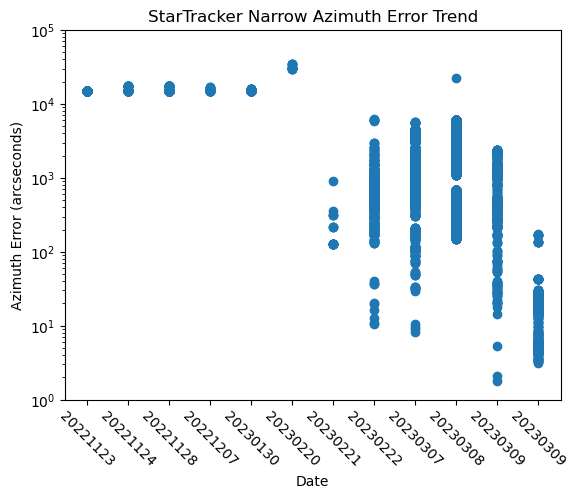

In [6]:
plot_dates = dates + [20230309]
xticks = np.arange(1,13,1)
plt.title("StarTracker Narrow Azimuth Error Trend")
plt.scatter(xaxis, deltaazs)
plt.yscale('log')
plt.ylim(1.0, 1.0E5)
plt.xticks(xticks, plot_dates, rotation=-45)
plt.xlabel("Date")
plt.ylabel("Azimuth Error (arcseconds)")
